In [1]:
from d2l import tensorflow as d2l
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 50, 1000  # Training and test dataset sizes

In [3]:
# Por reproducibilidad
np.random.seed(2020)

# Generamos un conjunto de observaciones de tamaño n_train + n_test \times 1
features = np.random.uniform(size=(n_train + n_test, 1))

# Por precaucion
np.random.shuffle(features)

# Calculamos potencias
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))

In [4]:
# Calculamos funcion
def target(x):
    return np.sin(2 * np.pi * x) + np.cos(2 * np.pi * x)

labels = target(features)

# Agregamos "ruido"
labels += np.random.normal(scale=np.sqrt(.5), size=labels.shape)

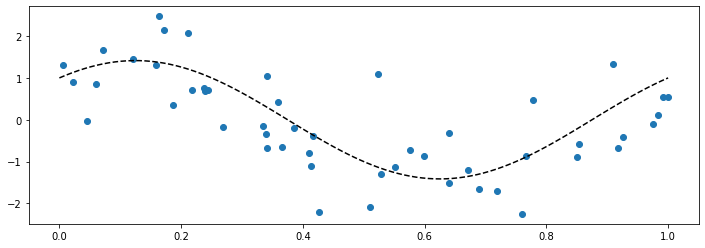

In [5]:
fig, ax = plt.subplots(1,1,figsize = [12,4])
x_ = np.linspace(0, 1, 100)
p_ = np.power(x_.reshape(-1,1), np.arange(max_degree).reshape(1, -1))
y_ = target(x_)

ax.plot(x_, y_, '--k');
ax.scatter(features[:n_train], labels[:n_train], color = 'C0');
# ax.scatter(features[n_train:], labels[n_train:], color = 'C1');

In [6]:
x_train, x_val = poly_features[:n_train], poly_features[n_train:]
y_train, y_val = labels[:n_train], labels[n_train:]

In [7]:
def square_loss(y_hat, y):
    return 0.5 * (y_hat - y)**2

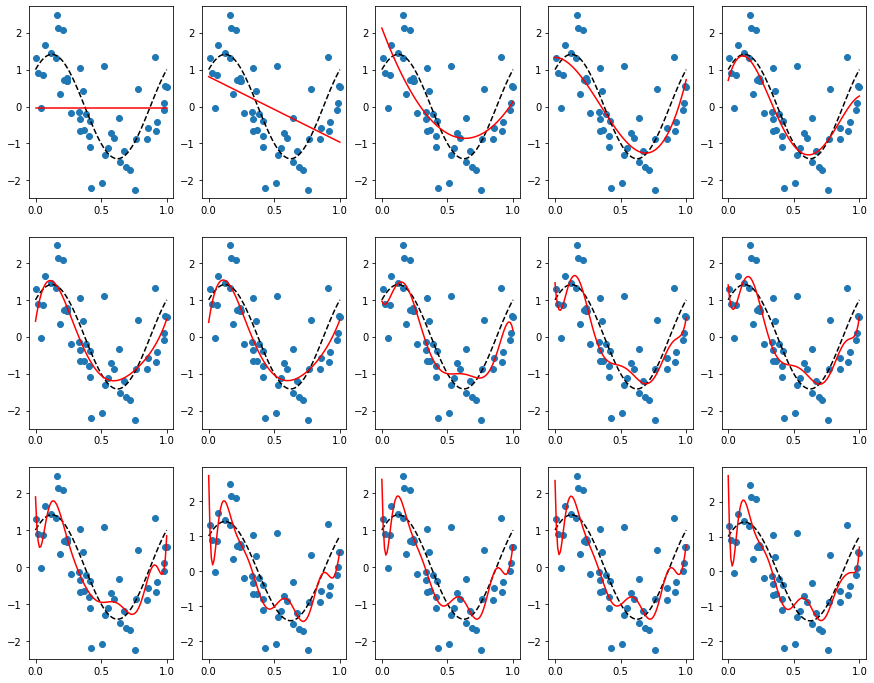

In [8]:
max_degree = 15
fig, axes  = plt.subplots(3,5,figsize = [15,12])
loss_train = []
loss_val   = []

for kk, ax in enumerate(axes.flatten()):
    degree = kk + 1
    
    # Solucion minimos cuadrados
    X = x_train[:,:degree]
    w_star = np.linalg.solve(X.T.dot(X), X.T.dot(y_train))
    
    # Grafica prediccion contra funcion latente
    ax.plot(x_, y_, '--k');
    ax.scatter(features[:n_train], labels[:n_train]);
    ax.plot(x_, p_[:,:degree].dot(w_star), 'red')
    
    # Calcula perdidas 
    loss_train.append(square_loss(x_train[:,:degree].dot(w_star), y_train).mean())
    loss_val.append(square_loss(x_val[:,:degree].dot(w_star), y_val).mean())
    

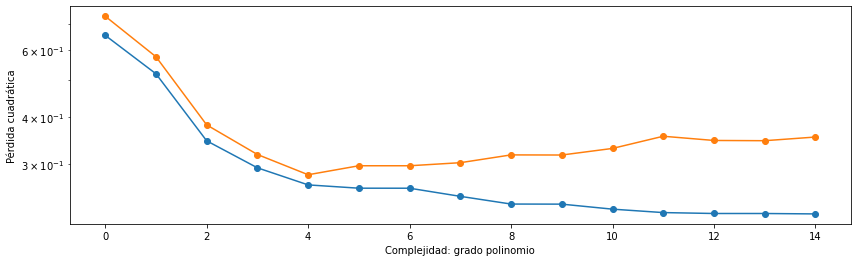

In [9]:
fig, ax = plt.subplots(1,1,figsize = [14,4])

ax.plot(np.arange(max_degree), loss_train);
ax.scatter(np.arange(max_degree), loss_train);
ax.plot(np.arange(max_degree), loss_val);
ax.scatter(np.arange(max_degree), loss_val);
ax.set_yscale('log')

ax.set_xlabel('Complejidad: grado polinomio');
ax.set_ylabel('Pérdida cuadrática');

In [10]:
max_degree = 15
n_rep = 1000
metrics = np.zeros([n_rep, 2, max_degree])

for ii in np.arange(n_rep):
    features = np.random.uniform(size=(n_train, 1))
    poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
    x_train = poly_features
    
    labels  = target(features)
    labels += np.random.normal(scale=np.sqrt(.5), size=labels.shape)
    y_train = labels
    
    for degree in np.arange(max_degree):
        # Solucion minimos cuadrados
        X = x_train[:,:degree]
        w_star = np.linalg.solve(X.T.dot(X) + 1e-14 * np.eye(degree), X.T.dot(y_train))

        # Calcula perdidas 
        metrics[ii,:,degree] = (square_loss(x_train[:,:degree].dot(w_star), y_train).mean(), 
                     square_loss(x_val[:,:degree].dot(w_star), y_val).mean())

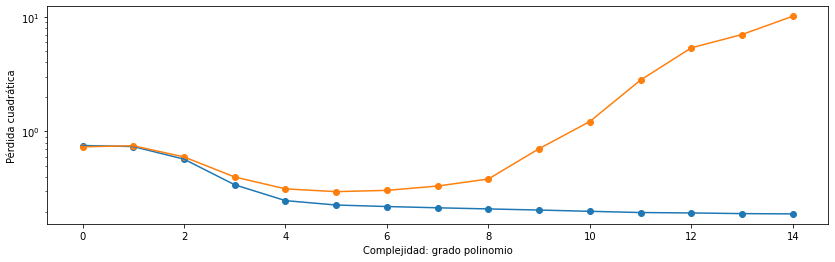

In [11]:
fig, ax = plt.subplots(1,1,figsize = [14,4])

ax.plot(np.arange(max_degree), metrics[:,0,:].mean(axis = 0), color = 'C0');
ax.scatter(np.arange(max_degree), metrics[:,0,:].mean(axis = 0), color = 'C0');

ax.plot(np.arange(max_degree), metrics[:,1,:].mean(axis = 0), color = 'C1');
ax.scatter(np.arange(max_degree), metrics[:,1,:].mean(axis = 0), color = 'C1');
ax.set_yscale('log')

ax.set_xlabel('Complejidad: grado polinomio');
ax.set_ylabel('Pérdida cuadrática');

## Ejercicios

1. Revisa el ejemplo del libro [Dive into Deep Learning](https://d2l.ai/chapter_multilayer-perceptrons/underfit-overfit.html) y argumenta por que las curvas de error de entrenamiento durante proceso de optimización las podemos interpretar como funciones del error en términos de complejidad.
1. En el ejemplo mencionado arriba, ¿por qué incluso cuando tienen un polinomio de grado mayor, no vemos un comportamiento como el de la gráfica de arriba?
1. En el ejemplo mencionado arriba parece que hay un nivel de saturación en el error de entrenamiento. ¿Por qué? 
1. Incorpora una línea horizontal que marque el nivel del error de observación $\epsilon$ en el ejemplo de estas notas. Argumenta entonces cual parece ser un grado complejidad adecuado incorporando este conocimiento. ¿Será que siempre podemos incorporar esto?
